**Paso 1: Carga y "Tuneo" en Python (Colab)**



In [2]:
import pandas as pd

In [6]:
# 1. Cargar el dataset (ajusta el nombre si es .xlsx o .csv)
df = pd.read_csv('SampleSuperstore.csv', encoding='windows-1252')

In [14]:
# 2. Traducir columnas clave para que tu Dashboard sea profesional en español
columnas_es = {
    'Ship Mode': 'Metodo_Envio',
    'Segment': 'Segmento',
    'Country': 'Pais',
    'City': 'Ciudad',
    'State': 'Estado',
    'Region': 'Region',
    'Category': 'Categoria',
    'Sub-Category': 'Subcategoria',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad',
    'Discount': 'Descuento',
    'Profit': 'Ganancia'
}
df.rename(columns=columnas_es, inplace=True)

In [15]:
# 3. Crear una métrica crítica: Margen de Ganancia (%)
# Esto es lo que los gerentes realmente miran
df['Margen_Porcentaje'] = (df['Ganancia'] / df['Ventas']) * 100

In [17]:
# 4. Asegurar traducción y convertir fechas
if 'Order Date' in df.columns:
    df.rename(columns={'Order Date': 'Fecha_Pedido'}, inplace=True)

# Verificar si la columna existe antes de convertir
if 'Fecha_Pedido' in df.columns:
    df['Fecha_Pedido'] = pd.to_datetime(df['Fecha_Pedido'])
    print("Columna 'Fecha_Pedido' convertida exitosamente.")
else:
    print("Error: No se encontró 'Fecha_Pedido' ni 'Order Date'. Revisa el Paso 1.")

# Guardar para Power BI
df.to_csv('Superstore_Limpio.csv', index=False)

Error: No se encontró 'Fecha_Pedido' ni 'Order Date'. Revisa el Paso 1.


**Paso 2: Análisis de Pérdidas**

In [18]:
# Identificar productos con Ganancia Negativa
productos_en_perdida = df[df['Ganancia'] < 0].groupby('Subcategoria')['Ganancia'].sum().sort_values()

print("Subcategorías que más dinero pierden:")
print(productos_en_perdida.head())

Subcategorías que más dinero pierden:
Subcategoria
Binders     -38510.4964
Tables      -32412.1483
Machines    -30118.6682
Bookcases   -12152.2060
Chairs       -9880.8413
Name: Ganancia, dtype: float64


Análisis de Subcategorías en Pérdida:
                Ganancia       Ventas  Descuento
Subcategoria                                    
Binders      -38510.4964   36140.6130   0.738010
Tables       -32412.1483  104978.5460   0.365271
Machines     -30118.6682   72456.2530   0.581818
Bookcases    -12152.2060   48072.7408   0.348532
Chairs        -9880.8413   91988.4560   0.261277
Appliances    -8629.6412    3382.5340   0.800000
Phones        -7530.6235   35797.8400   0.342647
Furnishings   -6490.9134   12845.8440   0.530539
Storage       -6426.3038   37869.0720   0.200000
Supplies      -3015.6219   14067.1760   0.200000
Accessories    -930.6265   10958.8000   0.200000
Fasteners       -33.1952     149.2800   0.200000


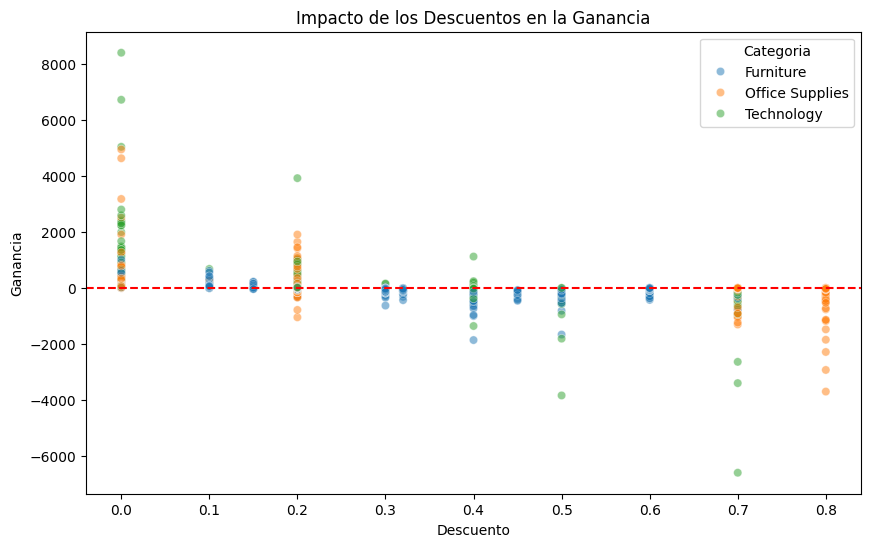

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu dataframe se llama 'df' y ya tiene las columnas traducidas
# 1. Filtrar solo las ventas con pérdida
df_perdidas = df[df['Ganancia'] < 0].copy()

# 2. Agrupar por Subcategoría para ver quién es el "agujero negro" de dinero
resumen_perdidas = df_perdidas.groupby('Subcategoria').agg({
    'Ganancia': 'sum',
    'Ventas': 'sum',
    'Descuento': 'mean' # Promedio de descuento aplicado
}).sort_values(by='Ganancia')

print("Análisis de Subcategorías en Pérdida:")
print(resumen_perdidas)

# 3. Visualización de la relación Descuento vs Ganancia
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Descuento', y='Ganancia', hue='Categoria', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Impacto de los Descuentos en la Ganancia')
plt.show()